In [26]:
# import library, pandas and numpy to read the dataset,matplotlib to visualize data and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

 

## Explore The Data

#### Read the `sephora_website_dataset.csv` dataset into an object named `seph`

In [27]:
# read the dataset using pd.read_csv,
seph = pd.read_csv('sephora_website_dataset.csv')  

In [28]:
#To display the content of the first five rows
seph.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [29]:
# show dataset shape
seph.shape

(9168, 21)

In [30]:
#  Remove some unnecessary columns that we don't need
seph.drop(['size','value_price','URL','MarketingFlags_content','options','details','how_to_use','online_only','limited_time_offer'],axis='columns',inplace= True)

In [31]:
# show dataset shape after edit
seph.shape 

(9168, 12)

In [32]:
# check on columns names
seph.columns

Index(['id', 'brand', 'category', 'name', 'rating', 'number_of_reviews',
       'love', 'price', 'MarketingFlags', 'ingredients', 'exclusive',
       'limited_edition'],
      dtype='object')

In [33]:
# explore the data type at each series
seph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9168 non-null   int64  
 1   brand              9168 non-null   object 
 2   category           9168 non-null   object 
 3   name               9168 non-null   object 
 4   rating             9168 non-null   float64
 5   number_of_reviews  9168 non-null   int64  
 6   love               9168 non-null   int64  
 7   price              9168 non-null   float64
 8   MarketingFlags     9168 non-null   bool   
 9   ingredients        9168 non-null   object 
 10  exclusive          9168 non-null   int64  
 11  limited_edition    9168 non-null   int64  
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 797.0+ KB


In [34]:
#Displays the statistical description of the dataset
seph.describe()

,id,rating,number_of_reviews,love,price,exclusive,limited_edition
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,0.264725,0.091841
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,0.441211,0.288817
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,1.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,1.000000,1.000000


In [35]:
# check to null values
seph.isna().sum()

id                   0
brand                0
category             0
name                 0
rating               0
number_of_reviews    0
love                 0
price                0
MarketingFlags       0
ingredients          0
exclusive            0
limited_edition      0
dtype: int64

In [36]:
#To display the content of the first five rows
seph.head()

,id,brand,category,name,rating,number_of_reviews,love,price,MarketingFlags,ingredients,exclusive,limited_edition
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,4.0,4,3002,66.0,True,Arancia di Capri Eau de Toilette: Alcohol Dena...,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,4.5,76,2700,66.0,True,unknown,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,4.5,26,2600,180.0,True,Alcohol Denat.- Water- Fragrance- Limonene- Li...,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,4.5,23,2900,120.0,True,unknown,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,3.5,2,943,72.0,True,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,0,0


In [37]:
#The importance of the data type
type(seph)

pandas.core.frame.DataFrame

In [38]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## 1  What is the most loved product by people at Sephora ?

In [39]:
seph.love.max()

1300000

In [40]:
a=seph.groupby(['name'])[['love']].max().sort_values('love',ascending=False).head()
a

,love
name,
Everlasting Liquid Lipstick,1300000
Radiant Creamy Concealer,770700
Brow Wiz,660000
Translucent Loose Setting Powder,657100
Blush,646600


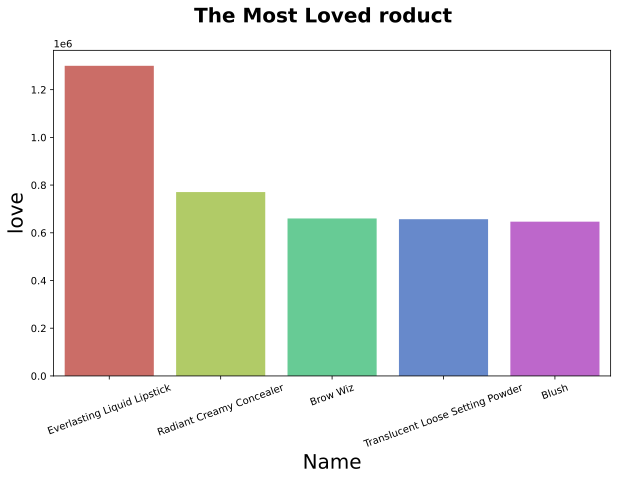

In [41]:
plt.figure(figsize=(10,6))

#sns.barplot(a.index,a.love, palette = sns.color_palette("Set2"));
sns.barplot(data=a, x=a.index, y='love',palette=sns.color_palette("hls",5));
plt.xticks(rotation=20);

plt.xlabel('Name',fontsize = 20);
plt.ylabel('love',fontsize = 20);

bar_love=plt.suptitle('The Most Loved roduct',fontsize = 20,weight = 'bold');
plt.savefig('imageq1.png')



#### "Everlasting Liquid Lipstick" It is the women's favorite product

## 2 How many Sephora products have a rating of 5.0 ?

In [42]:
seph.rating.value_counts()

4.5    3527
4.0    2853
3.5    1051
5.0     872
0.0     398
3.0     308
2.5      88
2.0      39
1.0      23
1.5       9
Name: rating, dtype: int64

#### Sephora has about 872 products with a high rating of 5.0

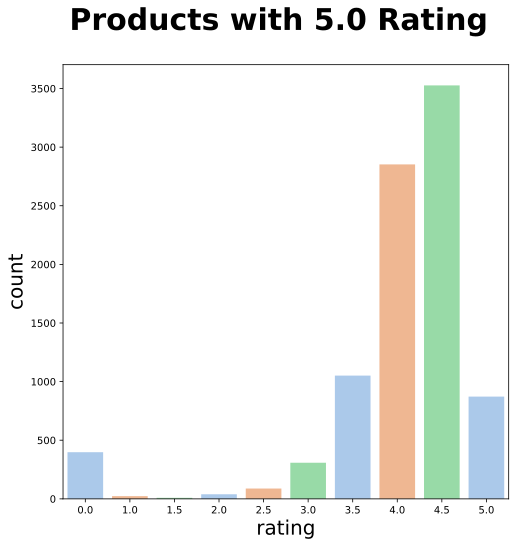

In [43]:
plt.figure(figsize=(8,8))
plt.xlabel('Rating',fontsize = 20);
plt.ylabel('Count',fontsize = 20);
sns.countplot(x=seph.rating,palette = sns.color_palette("pastel",3));
plt.suptitle('Products with 5.0 Rating',fontsize = 30,weight = 'bold');
plt.savefig('Project maha sephora jupeter')
plt.savefig('imageq2.png')

## **3 What is the most popular category of products at Sephora's website ?**

In [44]:
seph.category.value_counts()

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Spa Tools                      1
Body Moisturizers              1
Hair Styling & Treatments      1
Cleansing Brushes              1
High Tech Tools                1
Name: category, Length: 143, dtype: int64

#### We found that the most popular category with products on Sephora is "perfumes" with approximately 665 products, followed by "Moisturizers" with 451 products.

In [45]:
x=seph.category.value_counts() #To clarify, I made the following diagram

In [46]:
X1 = x.values.flatten()

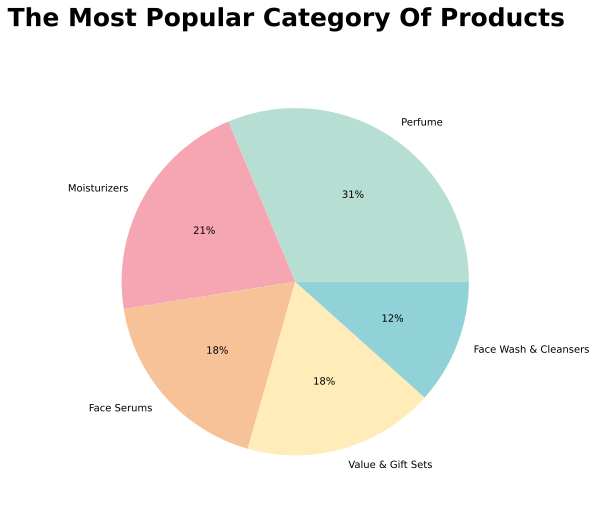

In [47]:
colors = ['#b7ded2','#f6a6b2','#f7c297','#ffecb8','#90d2d8']
plt.figure(figsize=(10,8))
labels = ['Perfume','Moisturizers','Face Serums','Value & Gift Sets','Face Wash & Cleansers'];
plt.pie(X1[:5],autopct='%.0f%%',colors=colors , labels=labels);
plt.suptitle('The Most Popular Category Of Products',fontsize = 25,weight = 'bold');
plt.savefig('Project maha sephora jupeter')
plt.savefig('imageq3.png')

## 4	What is the most expensive product on Sephora website ?

In [48]:
d= seph.groupby(['name'])[['price']].max().sort_values('price',ascending=False).head()
d

,price
name,
Airwrap™ Styler,549.0
Corrale™ Hair Straightener,499.0
Neuropeptide Smoothing Facial Conformer,495.0
Orchidée Impériale The Cream,460.0
Elixir Vitae Serum Wrinkle Solution,450.0


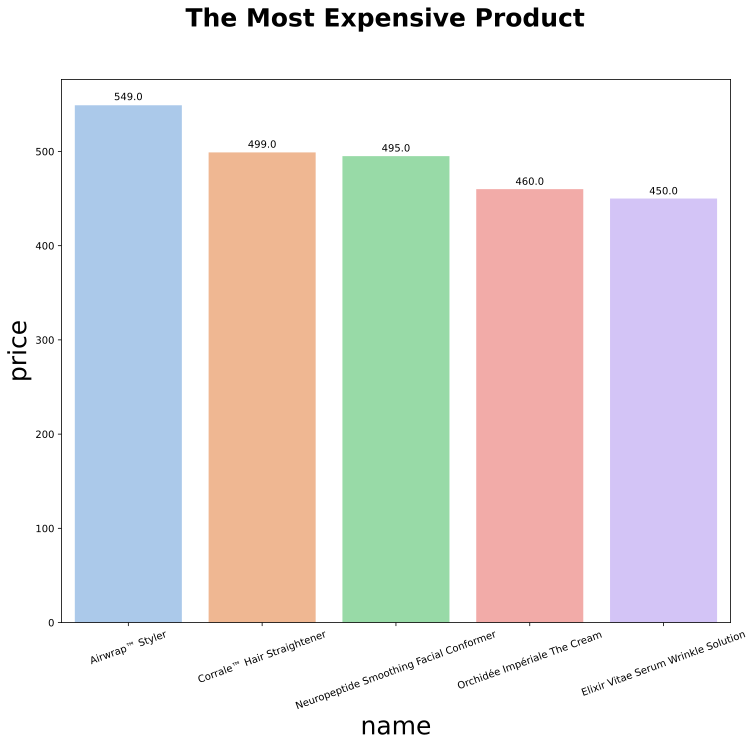

In [49]:

plt.figure(figsize=(12,10))
plt.xlabel('Name',fontsize = 25);
plt.ylabel('Price',fontsize = 25);
bar_1=sns.barplot(d.index,d.price, palette = sns.color_palette("pastel",5,))
bar_1.set_xticklabels(bar_1.get_xticklabels() ,rotation=20);
show_values(bar_1)
plt.suptitle('The Most Expensive Product',fontsize = 25,weight = 'bold');
plt.savefig('Project maha sephora jupeter')
plt.savefig('imageq4.png')

#### The most expensive product is "Airwrap™ Styler" at 549.0